<h2>Naive Bayes Theorem</h2>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("Iris.csv")

In [79]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

__Naive Bayes Classifier__

__Define X (feature) and Y(target) for the Model__

In [81]:
X = df.drop(columns=['Species'])
Y = df['Species']
print("Features:\n",X)
print("Target:\n",Y)

Features:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
Target:
 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginic

__Splitting the Dataset into training and testing model and fit it into model__

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

In [83]:
#Split data into training and testing model

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 5)
(38, 5)
(112,)
(38,)


In [84]:
#Initialize GaussianNB as a Classifier
model = GaussianNB()
#train the model
model.fit(X_train,Y_train)
#Predictions
Y_pred = model.predict(X_test)
model.score(X_test,Y_test)


1.0

In [85]:
print(accuracy_score(Y_test,Y_pred))

1.0


In [92]:
Y_pred[:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype='<U15')

In [87]:
Y_test[:10]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
Name: Species, dtype: object

In [88]:
#printinng the confusion matrix
conf = confusion_matrix(Y_test,Y_pred)
print(conf)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


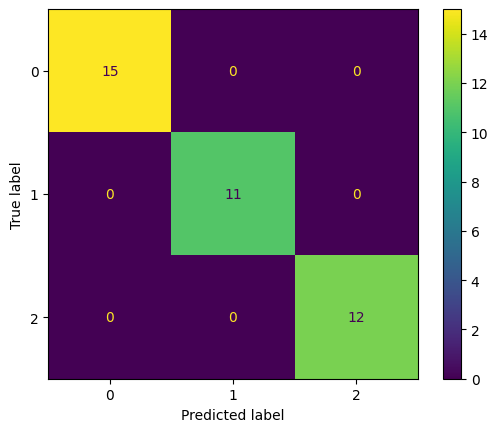

In [89]:
#print Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

In [90]:
#print the values of TP,FP,FN,TN

def get_values(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    return (cm[0][0],cm[0][1],cm[1][0],cm[1][1])

TP , FP , FN , TN = get_values(Y_test,Y_pred)

print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("TN:", TN)

TP: 15
FP: 0
FN: 0
TN: 11


In [91]:
#Print the values of accuracy, precision, recall
print("Accuracy :",(TP+TN)/(TP+TN+FN+FP))
print("Precision:",(TP/(TP+FP)))
print("Recall:",(TP/(TP+FN)))

Accuracy : 1.0
Precision: 1.0
Recall: 1.0
